$$p=\{c_1, c_2, \cdots, c_n\} \, c_i=(x_i,y_i)\in R^2$$
$$f(p)=\Sigma_{i=1}^{n-1} \sqrt{(x(c_i)-x(c_{i+1}))^2+(y(c_i)-y(c_{i+1}))^2}$$

# Import Package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

from tsp.coordinate import Coordinate

# Initialize City Coordinates

In [64]:
n = 20
cities = Coordinate.random_coordinate(20)

# Visualize Cities

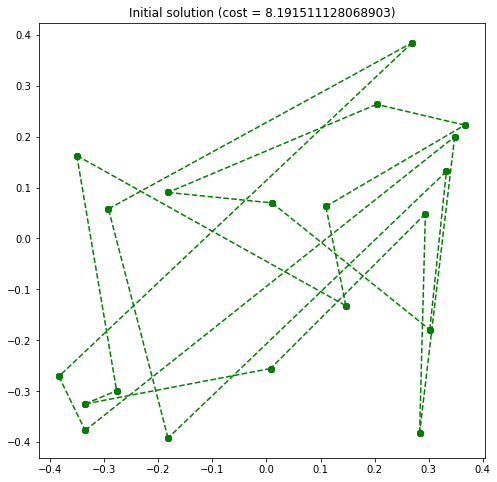

In [65]:
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(111)

for a, b in zip(cities[:-1], cities[1:]):
    ax1.plot([a.x, b.x], [a.y, b.y], '--o', c='g')

ax1.plot([cities[0].x, cities[-1].x], [cities[0].y, cities[-1].y], '--o', c='g')

for city in cities:
    ax1.scatter(city.x, city.y, c='black')

plt.title('Initial solution (cost = ' + str(Coordinate.get_total_distance(cities)) + ')')

plt.show()

# Simulated Annealing Algorithm

In [70]:
e_old = Coordinate.get_total_distance(cities)
costs = [e_old]

kb = 5.6074e-5
T = 1000
factor = 0.99
T0 = T

i = 0

while T > 0.01:
    print('Iteration:', i, 'Temperature:', T, 'Cost:', e_old)

    for _ in range(10):
        c1, c2 = np.random.randint(0, len(cities), 2)

        cities[c1], cities[c2] = cities[c2], cities[c1]

        e_new = Coordinate.get_total_distance(cities)

        delta = e_new - e_old

        if delta > 0:
            if np.random.rand() < np.exp(-delta / T):
                e_old = e_new
            else:
                cities[c1], cities[c2] = cities[c2], cities[c1]
        else:
            e_old = e_new

        e_old = Coordinate.get_total_distance(cities)
        costs += [e_old]

    i += 1
    T = T * factor

Iteration: 0 Temperature: 1000 Cost: 6.44290467967655
Iteration: 0 Temperature: 990.0 Cost: 9.293622444962523
Iteration: 0 Temperature: 980.1 Cost: 10.032940409899188
Iteration: 0 Temperature: 970.299 Cost: 9.095690235942037
Iteration: 0 Temperature: 960.59601 Cost: 10.248993766568354
Iteration: 0 Temperature: 950.9900498999999 Cost: 9.770541521710834
Iteration: 0 Temperature: 941.480149401 Cost: 9.25490888217791
Iteration: 0 Temperature: 932.0653479069899 Cost: 8.18803884385564
Iteration: 0 Temperature: 922.74469442792 Cost: 10.15939727642475
Iteration: 0 Temperature: 913.5172474836407 Cost: 9.038953018349916
Iteration: 0 Temperature: 904.3820750088043 Cost: 9.477282458103764
Iteration: 0 Temperature: 895.3382542587163 Cost: 9.276892223809785
Iteration: 0 Temperature: 886.3848717161292 Cost: 9.318800873957784
Iteration: 0 Temperature: 877.5210229989679 Cost: 8.708391771575553
Iteration: 0 Temperature: 868.7458127689781 Cost: 9.624493104324475
Iteration: 0 Temperature: 860.058354641288

# Visualize Solution

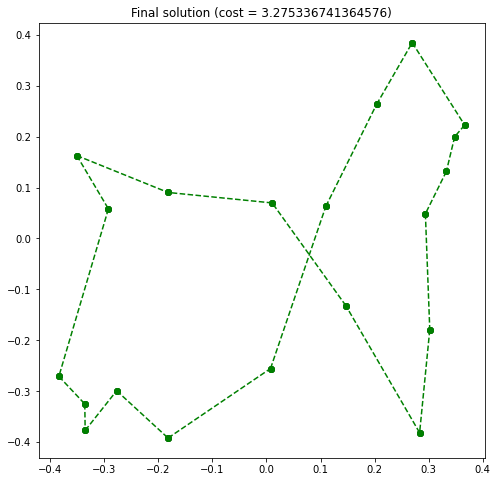

In [71]:
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(111)

for a, b in zip(cities[:-1], cities[1:]):
    ax1.plot([a.x, b.x], [a.y, b.y], '--o', c='g')

ax1.plot([cities[0].x, cities[-1].x], [cities[0].y, cities[-1].y], '--o', c='g')

for city in cities:
    ax1.scatter(city.x, city.y, c='black')

plt.title('Final solution (cost = ' + str(Coordinate.get_total_distance(cities)) + ')')

plt.show()

# Evolution of Path

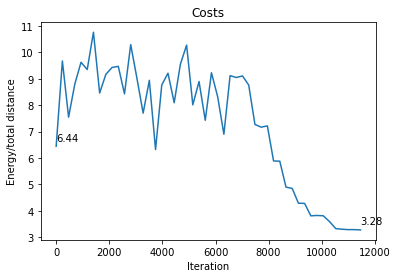

In [72]:
X = np.linspace(0, len(costs), len(costs))
Y = costs
exact_cycle = Coordinate.exact_cycle(cities)

xnew = np.linspace(X.min(), X.max(), 50)
power_smooth = make_interp_spline(X, Y)(xnew)

plt.plot(xnew, power_smooth)

plt.title('Costs')
plt.xlabel('Iteration')
plt.ylabel('Energy/total distance')
plt.annotate(str(round(costs[-1], 2)), xy=(len(costs), costs[-1]), xytext=(len(costs), costs[-1] + 0.2))
plt.annotate(str(round(costs[0], 2)), xy=(0, costs[0]), xytext=(10, costs[0] + 0.2))

plt.show()